# Heart Attack Data Exploration

In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_curve
import matplotlib.pyplot as plt
%matplotlib inline



## Loading and Preprocessing Heart Attack Data

In [2]:
# Loading data
file_path = Path("../Resources/heart_attack_prediction_dataset.csv")
df_heart = pd.read_csv(file_path)
df_heart.head()


Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    Male          208         158/88          72         0   
1    CZE1114   21    Male          389         165/93          98         1   
2    BNI9906   21  Female          324         174/99          72         1   
3    JLN3497   84    Male          383        163/100          73         1   
4    GFO8847   66    Male          318          91/88          93         1   

   Family History  Smoking  Obesity  ...  Triglycerides  \
0               0        1        0  ...            286   
1               1        1        1  ...            235   
2               0        0        0  ...            587   
3               1        1        0  ...            378   
4               1        1        1  ...            231   

   Physical Activity Days Per Week Sleep Hours Per Day    Country  \
0                                0                   6  Argentina   
1                                1                   7     Canada   
2                                4                   4     France   
3                                3                   4     Canada   
4                                1                   5   Thailand   

       Continent           Hemisphere  Heart Attack Risk  Unnamed: 26  \
0  South America  Southern Hemisphere                  0          NaN   
1  North America  Northern Hemisphere                  0          NaN   
2         Europe  Northern Hemisphere                  0          NaN   
3  North America  Northern Hemisphere                  0          NaN   
4           Asia  Northern Hemisphere                  0          NaN   

   latitude  longitude  
0       NaN        NaN  
1       NaN        NaN  
2       NaN        NaN  
3       NaN        NaN  
4       NaN        NaN  

[5 rows x 29 columns]

In [3]:
# Define target vector
y = df_heart["Heart Attack Risk"]
y[:10]

0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    1
8    0
9    0
Name: Heart Attack Risk, dtype: int64

In [4]:
# Define features set
X = df_heart.copy()
# Drop interfering and target columns
X.drop(["Patient ID","Country","Continent","Hemisphere", "Blood Pressure",
        "Smoking", "Diabetes", "Obesity", "Alcohol Consumption", "Previous Heart Problems", "Medication Use",
        "Family History", "Diet", "Sleep Hours Per Day", "Physical Activity Days Per Week", "Heart Attack Risk",
        "Stress Level", "Sex", "Unnamed: 26", "latitude", "longitude"], axis=1, inplace=True)
X.head()

Age  Cholesterol  Heart Rate  Exercise Hours Per Week  \
0   67          208          72                 4.168189   
1   21          389          98                 1.813242   
2   21          324          72                 2.078353   
3   84          383          73                 9.828130   
4   66          318          93                 5.804299   

   Sedentary Hours Per Day  Income        BMI  Triglycerides  
0                 6.615001  261404  31.251233            286  
1                 4.963459  285768  27.194973            235  
2                 9.463426  235282  28.176571            587  
3                 7.648981  125640  36.464704            378  
4                 1.514821  160555  21.809144            231

In [5]:
# Make sure that no data needs scaling
X.dtypes

Age                          int64
Cholesterol                  int64
Heart Rate                   int64
Exercise Hours Per Week    float64
Sedentary Hours Per Day    float64
Income                       int64
BMI                        float64
Triglycerides                int64
dtype: object

In [6]:
# Convert float numbers to int to reduce number of unique values
X['Exercise Hours Per Week'] = X['Exercise Hours Per Week'].astype(int)
X['Sedentary Hours Per Day'] = X['Sedentary Hours Per Day'].astype(int)
X['BMI'] = X['BMI'].astype(int)
X.nunique()

Age                          73
Cholesterol                 281
Heart Rate                   71
Exercise Hours Per Week      20
Sedentary Hours Per Day      12
Income                     8615
BMI                          22
Triglycerides               771
dtype: int64

In [7]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Fitting the Random Forest Model

In [8]:
## Build model with hyperparameters
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop =200, num =10)]
# Number of features to consider in every split
max_features = ['auto', 'log2', 'sqrt']
# Max number of levels in tree
max_depth = [2,5]
# Min number of samples required to split a node
min_samples_split = [2,5]
# Min number of samples required in each leaf node
min_samples_leaf = [1,2]
# Method of selecting samples for training each tree
bootstrap = [False]
# Create the random grid
param_grid = {'n_estimators' : n_estimators,
              'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf,
              'bootstrap' : bootstrap}
rf_Model = RandomForestClassifier()
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4, scoring='recall')
rf_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [False], 'max_depth': [2, 5],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 111, 122, 133, 144, 155, 166,
                                          177, 188, 200]},
             scoring='recall', verbose=2)

In [10]:
# Find the best parameters
rf_Grid.best_params_

{'bootstrap': False,
 'max_depth': 5,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 155}

In [8]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=100,
                                  class_weight={0:0.25,1:50},
                                  bootstrap=False,
                                  max_features='auto',
                                  )

In [9]:
# Fitting the model
rf_model = rf_model.fit(X_train, y_train)

## Making Predictions Using the Random Forest Model

In [12]:
# Making predictions using the testing data
import numpy as np
predictions = rf_model.predict_proba(np.array(X_test))
prediction_threshold = (predictions [:,1] >= 0.47).astype('int')
prediction_threshold

C:\Users\Oormi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

In [13]:
# Confirmed positive heart attack risk values to use in demo
np.array([X_test.values[26]])

array([[    89,    385,     55,      6,      2, 170157,     33,    287]],
      dtype=int64)

## Model Evaluation

In [14]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, prediction_threshold)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, prediction_threshold)

In [15]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Confusion matrix Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, prediction_threshold))

Confusion Matrix


Predicted 0  Predicted 1
Actual 0         1029           96
Actual 1          558           70

Confusion matrix Accuracy Score : 0.6269252709640616
Classification Report
              precision    recall  f1-score   support

           0       0.65      0.91      0.76      1125
           1       0.42      0.11      0.18       628

    accuracy                           0.63      1753
   macro avg       0.54      0.51      0.47      1753
weighted avg       0.57      0.63      0.55      1753



## Feature Importance

[(0.17223237290917104, 'Income'), (0.16247190893827804, 'Triglycerides'), (0.15601709050768384, 'Cholesterol'), (0.13353626238991942, 'Heart Rate'), (0.12266813572455104, 'Age'), (0.09075641697943648, 'BMI'), (0.08281284492232827, 'Exercise Hours Per Week'), (0.07950496762863189, 'Sedentary Hours Per Day')]


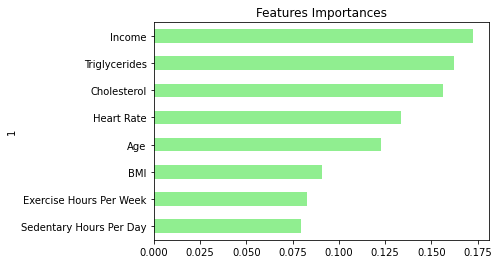

In [16]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can visualise and sort the features by their importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)
print(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))

## Plot the difference between the actual and the predicted value.

C:\Users\Oormi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Oormi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


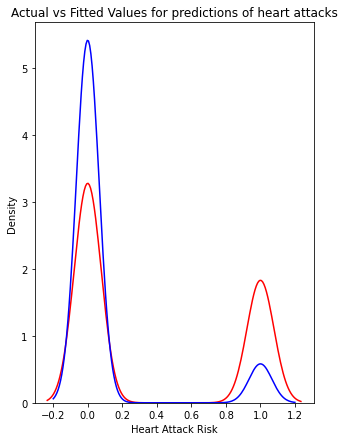

In [18]:
import seaborn as sns
plt.figure(figsize=(5, 7))

y_pred = prediction_threshold

ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)

plt.title('Actual vs Fitted Values for predictions of heart attacks')

plt.show()
plt.close()

## Import and run Joblib

In [19]:
import pickle
# create an iterator object with write permission - model.pkl
with open('model_pkl', 'wb') as f:
    pickle.dump(rf_model, f)
# in your prediction file                                                                                                                                                                                                           
with open('model_pkl', 'rb') as f:
    rf = pickle.load(f)